In [ ]:
!kaggle datasets download -d parisrohan/credit-score-classification

Dataset URL: https://www.kaggle.com/datasets/parisrohan/credit-score-classification
License(s): CC0-1.0
 63% 6.00M/9.51M [00:00<00:00, 59.0MB/s]
100% 9.51M/9.51M [00:00<00:00, 61.3MB/s]


In [ ]:
!unzip /content/credit-score-classification.zip

Archive:  /content/credit-score-classification.zip
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('train.csv')
df.head()

<ipython-input-4-fc968f92adc9>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
df.isna().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


In [ ]:
df=df.drop(['Month','ID','Customer_ID','Name','SSN'],axis=1)
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
df.dtypes

,0
Age,object
Occupation,object
Annual_Income,object
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,int64
Num_Credit_Card,int64
Interest_Rate,int64
Num_of_Loan,object
Type_of_Loan,object
Delay_from_due_date,int64


In [ ]:
df['Age']=df['Age'].str.replace('[/_]','',regex=True)
df['Annual_Income']=df['Annual_Income'].str.replace('[/_]','',regex=True)
df['Num_of_Loan']=df['Num_of_Loan'].str.replace('[/_]','',regex=True)
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].str.replace('[/_]','',regex=True)
df['Outstanding_Debt']=df['Outstanding_Debt'].str.replace('[/_]','',regex=True)
df['Amount_invested_monthly']=df['Amount_invested_monthly'].str.replace('[/_]','',regex=True)
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].str.replace('[/_]','',regex=True)
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace(' and ', ' ').str.replace(' ', '')
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,"AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...",3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,NaN,3,4,3,4,"AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...",-1,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,NaN,3,4,3,4,"AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...",3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,NaN,3,4,3,4,"AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...",5,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,1824.843333,3,4,3,4,"AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...",6,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359.415833,4,6,7,2,"AutoLoan,StudentLoan",23,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,3359.415833,4,6,7,2,"AutoLoan,StudentLoan",18,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"AutoLoan,StudentLoan",27,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,25,Mechanic,39628.99,3359.415833,4,6,7,2,"AutoLoan,StudentLoan",20,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
df['Credit_History_Age'].head(10)

,Credit_History_Age
0,22 Years and 1 Months
1,NaN
2,22 Years and 3 Months
3,22 Years and 4 Months
4,22 Years and 5 Months
5,22 Years and 6 Months
6,22 Years and 7 Months
7,NaN
8,26 Years and 7 Months
9,26 Years and 8 Months


In [ ]:
def convert_to_months(age):
    if pd.isna(age):
        return np.nan


    age = age.lower().replace("and", "").replace("years", "").replace("months", "").strip()
    parts = age.split()

    years = 0
    months = 0


    if len(parts) == 1:
        if "year" in age:
            years = int(parts[0])
        elif "month" in age:
            months = int(parts[0])
    elif len(parts) == 2:
        years = int(parts[0])
        months = int(parts[1])

    return years * 12 + months


df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(convert_to_months)

In [ ]:
df['Age']=pd.to_numeric(df['Age'],errors='coerce')
df['Annual_Income']=pd.to_numeric(df['Annual_Income'],errors='coerce')
df['Num_of_Loan']=pd.to_numeric(df['Num_of_Loan'],errors='coerce')
df['Num_of_Delayed_Payment']=pd.to_numeric(df['Num_of_Delayed_Payment'],errors='coerce')
df['Changed_Credit_Limit']=pd.to_numeric(df['Changed_Credit_Limit'],errors='coerce')
df['Outstanding_Debt']=pd.to_numeric(df['Outstanding_Debt'],errors='coerce')
df['Amount_invested_monthly']=pd.to_numeric(df['Amount_invested_monthly'],errors='coerce')
df['Monthly_Balance']=pd.to_numeric(df['Monthly_Balance'],errors='coerce')
df['Credit_History_Age_Months']=pd.to_numeric(df['Credit_History_Age_Months'],errors='coerce')


In [ ]:
df.drop(columns=['Credit_History_Age'], inplace=True)

In [ ]:
df.loc[df['Age']<0,'Age']=df.loc[df['Age']<0,'Age']*(-1)
df.loc[df['Age']>99,'Age']=95

In [ ]:
if df['Credit_Score'].isna().sum()>0:
  df=df.dropna(subset=['Credit_Score'],inplace=True)
df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,1824.843333,3,4,3,4,"AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...",3,...,_,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,265.0
1,23,Scientist,19114.12,NaN,3,4,3,4,"AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...",-1,...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,NaN
2,95,Scientist,19114.12,NaN,3,4,3,4,"AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...",3,...,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267.0
3,23,Scientist,19114.12,NaN,3,4,3,4,"AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...",5,...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268.0
4,23,Scientist,19114.12,1824.843333,3,4,3,4,"AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...",6,...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359.415833,4,6,7,2,"AutoLoan,StudentLoan",23,...,_,502.38,34.663572,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor,378.0
99996,25,Mechanic,39628.99,3359.415833,4,6,7,2,"AutoLoan,StudentLoan",18,...,_,502.38,40.565631,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor,379.0
99997,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"AutoLoan,StudentLoan",27,...,Good,502.38,41.255522,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor,380.0
99998,25,Mechanic,39628.99,3359.415833,4,6,7,2,"AutoLoan,StudentLoan",20,...,Good,502.38,33.638208,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard,381.0


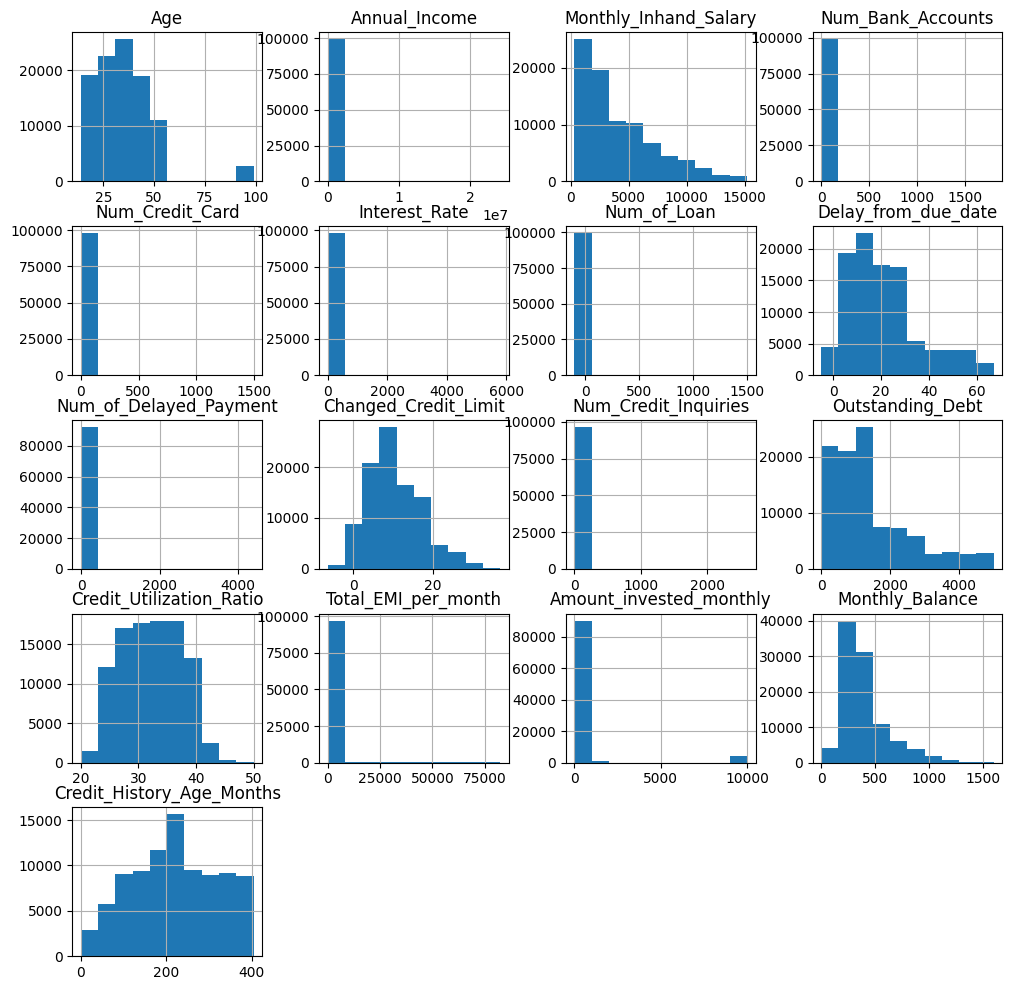

In [ ]:
df.hist(figsize=(12,12));

In [ ]:
X=df.drop('Credit_Score',axis=1)
y=df['Credit_Score'].copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
num_features=X_train.select_dtypes(include=[np.number]).columns
cat_features=X_train.select_dtypes(exclude=[np.number]).columns

In [ ]:
num_features,cat_features

(Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
        'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
        'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
        'Credit_History_Age_Months'],
       dtype='object'),
 Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
        'Payment_Behaviour'],
       dtype='object'))

In [ ]:
log_pipeline=Pipeline([
    ('impute',SimpleImputer(strategy='median')),
    ('trans',FunctionTransformer(np.log,feature_names_out='one-to-one')),
    ('scale',StandardScaler())
])


cat_pipeline=Pipeline([
    ('impute',SimpleImputer(strategy='constant',fill_value='Missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

num_pipeline=Pipeline([
    ('impute',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())
])

transformer=ColumnTransformer([
    ('num',num_pipeline,num_features),
    ('cat',cat_pipeline,cat_features),
    ('log', log_pipeline, ['Annual_Income'])
],remainder='passthrough')

estimator=RandomForestClassifier()

full_pipeline=Pipeline([
    ('preprocessing',transformer),
    ('estimator',estimator)
])



In [ ]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Paymen...
                                                                                 sparse_output=False))]),
                                                  Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object')),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('trans',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Annual_Income'])])),
                ('estimator', RandomForestClassifier())])

In [ ]:
full_pipeline.score(X_train,y_train)

0.9999875

In [ ]:
full_pipeline.score(X_test,y_test)

0.78305

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid={
    'estimator__n_estimators':[100,150,200],
    'estimator__criterion':['gini','entropy','log_loss']
}

grid_search=GridSearchCV(full_pipeline,param_grid,cv=3)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_...
      dtype='object')),
                                                                        ('log',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('trans',
                                                                                          FunctionTransformer(feature_names_out='one-to-one',
                                                                                                              func=<ufunc 'log'>)),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Annual_Income'])])),
                                       ('estimator',
                                        RandomForestClassifier())]),
             param_grid={'estimator__criterion': ['gini', 'entropy',
                                                  'log_loss'],
                         'estimator__n_estimators': [100, 150, 200]})

In [ ]:
grid_search.best_params_

{'estimator__criterion': 'gini', 'estimator__n_estimators': 200}

In [ ]:
random_forest=grid_search.best_estimator_
random_forest.fit(X_train,y_train)
random_forest.score(X_test,y_test)

0.787

In [ ]:
X_pred=random_forest.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score


In [ ]:
precision_score(y_test,X_pred,average='macro')

0.7782935702067376

In [ ]:
precision_score(y_test,X_pred,average='weighted')

0.7865277216700606

In [ ]:
recall_score(y_test,X_pred,average='weighted')

0.787

In [ ]:
f1_score(y_test,X_pred,average='weighted')

0.7866303880673566